In [1]:
import numpy as np
import matplotlib.pyplot as plt
import measuretf as mtf

T = 10
fs = 2**10
t = np.linspace(0, T, T*fs)
sweep = mtf.exponential_sweep(T, fs)
plt.plot(t, sweep)
plt.show()

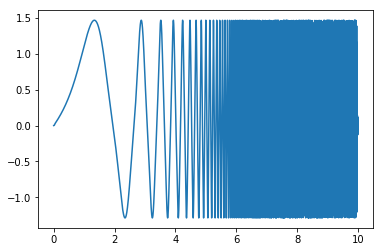

In [2]:
def system(x):
    return x + 0.1 * x**2 + 0.5 * x**3

response = system(sweep)
plt.plot(t, response)

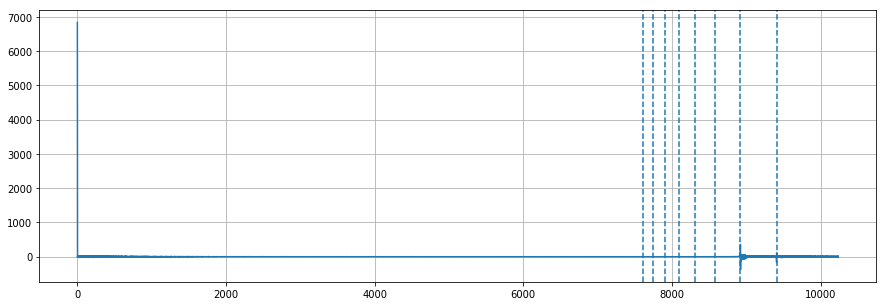

In [3]:
tf = mtf.transfer_function(sweep, response)

Ns = np.arange(2,10)
dts = mtf.exponential_sweep_harmonic_delay(T, fs, Ns)

plt.figure(figsize=(15,5))
plt.plot(tf)
for dt in dts:
    plt.axvline(x=(T-dt)*fs, ls='--')

plt.grid(True)

9824 3630 10240
9824 3630 10240


0.31794184849377266

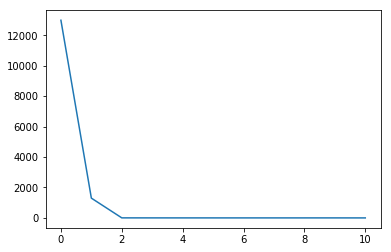

In [7]:
def energy_of_harmonics(r, fs, order=10):
    n = r.size
    orders = np.arange(1, order+3)
    T = n / fs
    dts = mtf.exponential_sweep_harmonic_delay(T, fs, orders)
    dns = np.round((T - dts) * fs).astype(int)
    e = np.zeros(order+1)
    for i in orders[:-3]:
        n_start =  int(round((dns[i+1] + dns[i+2]) / 2))
        n_stop =  int(round((dns[i+1] + dns[i]) / 2))
        e[i] = np.mean(np.abs(r[n_start:n_stop])**2)

    # fundamental
    n_start = int(round((dns[1] + n) / 2))
    n_end = int(round((dns[-1] / 2)))
    print(n_start, n_end, n)
    e[0] = np.mean(np.abs(r[n_start:])**2)
    e[0] += np.mean(np.abs(r[:n_end])**2)
    
    return e

plt.figure()
plt.plot(energy_of_harmonics(tf, fs, 10))

In [9]:
def thd(r, fs):
    e = energy_of_harmonics(r, fs, order=10)
    return np.sqrt(np.sum(e[1:]) / e[0])
    
thd(tf, fs)

9824 3630 10240


0.31794184849377266

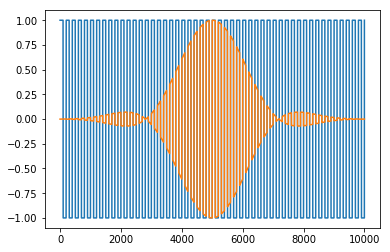

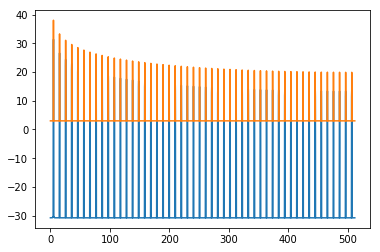

In [34]:
from scipy.signal import square, flattop

t = np.linspace(0, T, 10000)
f = 5
s = square(2 * np.pi * f * t, duty=0.5)
w = flattop(s.size)
plt.figure()
plt.plot(s)
plt.plot(w*s)

freqs = np.linspace(0, fs / 2, s.size // 2 + 1)
plt.figure()
w = flattop(s.size)
plt.plot(freqs, 10*np.log10(np.abs(np.fft.rfft(w*s))))
plt.plot(freqs, 10*np.log10(np.abs(np.fft.rfft(s))))